In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [40]:
npf = pd.read_csv("npf_train.csv")


In [41]:
npf = npf.set_index("date")

npf["class4"] = npf["class4"].astype("category")

npf = npf.drop("id",axis=1)

npf = npf.drop("partlybad",axis=1)

npf

,class4,CO2168.mean,CO2168.std,CO2336.mean,CO2336.std,CO242.mean,CO242.std,CO2504.mean,CO2504.std,Glob.mean,...,T672.mean,T672.std,T84.mean,T84.std,UV_A.mean,UV_A.std,UV_B.mean,UV_B.std,CS.mean,CS.std
date,,,,,,,,,,,,,,,,,,,,,
2000-01-01,nonevent,384.462000,2.284996,384.164462,2.135062,385.274688,2.211695,383.885077,1.955198,19.245511,...,-13.016471,0.525698,-12.422972,0.376324,1.635563,0.856948,0.026438,0.014617,0.003374,0.000733
2000-01-20,nonevent,374.884615,0.415185,374.703333,0.385179,375.621266,0.665720,374.674177,0.435480,31.107659,...,-8.997430,0.373927,-8.351043,0.575679,1.441109,0.741088,0.022649,0.012479,0.001501,0.000572
2000-01-23,nonevent,373.496585,0.189497,373.382593,0.172958,373.961481,0.235107,373.275062,0.165500,29.800885,...,-10.224472,0.965988,-9.651155,1.238891,2.677545,1.261612,0.044759,0.023748,0.000764,0.000048
2000-02-17,nonevent,378.600367,1.934180,378.464862,1.946536,379.785872,2.865022,378.316909,1.983430,23.795211,...,-1.535183,0.122651,-0.829524,0.134191,2.261805,1.345651,0.030893,0.021903,0.002038,0.000751
2000-03-25,Ib,373.128684,1.096617,372.980000,1.047750,373.701830,1.259198,372.910000,1.004164,252.480327,...,-2.095641,1.695622,-1.095864,2.090111,12.906779,7.022300,0.333523,0.239981,0.000662,0.000210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011-08-14,nonevent,377.541538,6.391551,377.802756,6.187754,380.131355,8.036365,377.507244,5.398886,270.743458,...,16.470062,2.142789,17.077060,2.779125,16.129744,12.203500,0.786032,0.696306,0.002360,0.000253
2011-08-16,nonevent,381.016623,4.411571,381.030844,4.062115,382.901742,5.061991,381.072078,3.840630,121.227780,...,16.319361,1.089563,17.268471,1.308728,8.688739,8.320799,0.464422,0.496816,0.002423,0.000425
2011-08-18,nonevent,386.687895,12.065627,386.284079,11.751004,392.981111,14.968791,386.336908,11.457833,108.311442,...,13.315270,0.511146,13.781909,0.838839,7.375727,5.115708,0.366155,0.316015,0.001993,0.000391


In [42]:
#
class2 = np.array(["event"]*npf.shape[0],dtype="object")
class2[npf["class4"]=="nonevent"] = "nonevent"
npf["class2"] = class2
npf["class2"] = npf["class2"].astype("category")

In [43]:
#y_train = npf['class4']
#X_train = npf.loc[:, npf.columns != 'class4']

y_train = npf['class2']
X_train = npf.drop("class2",axis=1)
X_train = X_train.drop("class4",axis=1)

In [44]:
#data_classes = pd.unique(npf['class4'])
#d = dict(zip(data_classes, range(0,4)))
##d = dict(zip(data_classes, (3,2,1,0)))

data_classes = pd.unique(npf['class2'])
d = dict(zip(data_classes, range(0,2)))

print(d)


y_train.replace(d, inplace=True)

y_train

{'nonevent': 0, 'event': 1}


date
2000-01-01    0
2000-01-20    0
2000-01-23    0
2000-02-17    0
2000-03-25    1
             ..
2011-08-14    0
2011-08-16    0
2011-08-18    0
2011-08-21    0
2011-08-22    0
Name: class2, Length: 458, dtype: int64

In [45]:
model = LinearRegression()
model.fit(X_train,y_train)
importance = model.coef_
for i,v in enumerate(importance):
    print('Feature %0d: %s\t Score: %.5f' % (i+1,X_train.columns[i],v))

Feature 1: CO2168.mean	 Score: -0.15906
Feature 2: CO2168.std	 Score: -0.02493
Feature 3: CO2336.mean	 Score: 0.39041
Feature 4: CO2336.std	 Score: 0.00848
Feature 5: CO242.mean	 Score: 0.08406
Feature 6: CO242.std	 Score: -0.02775
Feature 7: CO2504.mean	 Score: -0.31754
Feature 8: CO2504.std	 Score: 0.06101
Feature 9: Glob.mean	 Score: 0.00128
Feature 10: Glob.std	 Score: -0.00014
Feature 11: H2O168.mean	 Score: 0.54318
Feature 12: H2O168.std	 Score: 3.67787
Feature 13: H2O336.mean	 Score: -2.43312
Feature 14: H2O336.std	 Score: -3.27457
Feature 15: H2O42.mean	 Score: 0.02557
Feature 16: H2O42.std	 Score: 1.96821
Feature 17: H2O504.mean	 Score: 2.56614
Feature 18: H2O504.std	 Score: 0.42975
Feature 19: H2O672.mean	 Score: -0.54357
Feature 20: H2O672.std	 Score: 0.40826
Feature 21: H2O84.mean	 Score: -0.24873
Feature 22: H2O84.std	 Score: -3.14255
Feature 23: NET.mean	 Score: 0.00089
Feature 24: NET.std	 Score: 0.00001
Feature 25: NO168.mean	 Score: 6.66614
Feature 26: NO168.std	 Score

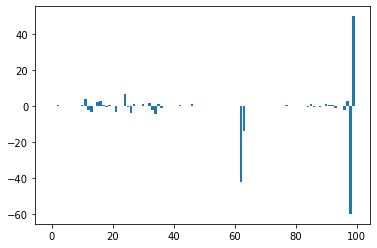

In [46]:
plt.bar([x for x in range(len(importance))], importance)
plt.show()